# IMPORTING  REQUIRED LIBRARIES

In [88]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import imblearn

# To Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# loading data

In [89]:
df_train = pd.read_csv(r"C:\Users\sushma reddy\Downloads\network intrusion detection\Train_data.csv")
df_test = pd.read_csv(r"C:\Users\sushma reddy\Downloads\network intrusion detection\Test_data.csv")

# Sample view of training set

In [90]:
#data frame first five rows
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# EXPLORATORY DATA ANALYSIS

In [91]:
# statistical summary
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
print(df_train['num_outbound_cmds'].value_counts())
print(df_test['num_outbound_cmds'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    22544
Name: num_outbound_cmds, dtype: int64


In [93]:
#dropping the num_outbound_cmds
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [94]:
df_train.shape

(25192, 41)

In [95]:
df_test.shape

(22544, 40)

In [96]:
df_train['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
5        anomaly
6        anomaly
7        anomaly
8        anomaly
9        anomaly
10       anomaly
11       anomaly
12        normal
13       anomaly
14       anomaly
15       anomaly
16        normal
17       anomaly
18        normal
19        normal
20       anomaly
21       anomaly
22        normal
23        normal
24       anomaly
25        normal
26       anomaly
27        normal
28        normal
29        normal
          ...   
25162     normal
25163    anomaly
25164     normal
25165     normal
25166    anomaly
25167     normal
25168     normal
25169     normal
25170    anomaly
25171    anomaly
25172    anomaly
25173     normal
25174    anomaly
25175     normal
25176     normal
25177     normal
25178    anomaly
25179    anomaly
25180    anomaly
25181    anomaly
25182    anomaly
25183    anomaly
25184     normal
25185     normal
25186     normal
25187    anomaly
25188    anomaly
25189    anoma

number of attacks and class belongs to

In [97]:
labels = df_train['class'].copy()
labels[labels!='normal'] = 'anomaly'
labels.value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

# scaling numerical features

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extracting the numerical attributes and scale it to have zero mean and unit variance  
column = df_train.select_dtypes(include=['float64','int64']).columns

sn_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sn_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sn_traindf = pd.DataFrame(sn_train, columns = column)
sn_testdf = pd.DataFrame(sn_test, columns = column)

making all features with same level of magnitude, std is 1.

In [99]:
print(np.round(sn_traindf.std(axis=0)))

duration                       1.0
src_bytes                      1.0
dst_bytes                      1.0
land                           1.0
wrong_fragment                 1.0
urgent                         1.0
hot                            1.0
num_failed_logins              1.0
logged_in                      1.0
num_compromised                1.0
root_shell                     1.0
su_attempted                   1.0
num_root                       1.0
num_file_creations             1.0
num_shells                     1.0
num_access_files               1.0
is_host_login                  0.0
is_guest_login                 1.0
count                          1.0
srv_count                      1.0
serror_rate                    1.0
srv_serror_rate                1.0
rerror_rate                    1.0
srv_rerror_rate                1.0
same_srv_rate                  1.0
diff_srv_rate                  1.0
srv_diff_host_rate             1.0
dst_host_count                 1.0
dst_host_srv_count  

In [100]:
sn_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
5,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.868212,-1.001906,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
6,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.958592,-1.068731,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
7,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.904364,-1.024181,-0.066984,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
8,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.832060,-0.957356,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
9,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


# encoding categorical features

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
categorical_train = df_train.select_dtypes(include=['object']).copy()
categorical_test = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincategorical = categorical_train.apply(encoder.fit_transform)
testcategorical = categorical_test.apply(encoder.fit_transform)

# separate target column from encoded data 
encodingtrain = traincategorical.drop(['class'], axis=1)
categorical_Ytrain = traincategorical[['class']].copy()

In [102]:
train_x = pd.concat([sn_traindf,encodingtrain],axis=1)
train_y = df_train['class']
train_x.shape

(25192, 40)

In [103]:
test_df = pd.concat([sn_testdf,testcategorical],axis=1)
test_df.shape

(22544, 40)

# selecting the important features by performing recursive feature elimination

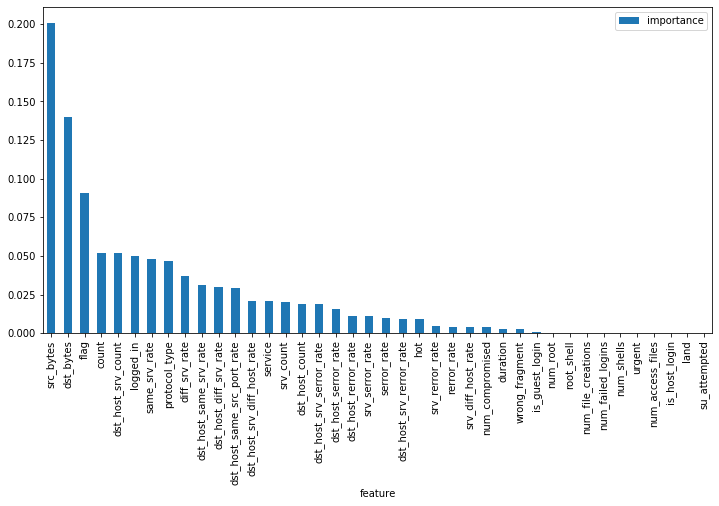

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier();

# fit random forest classifier on the training set
rf.fit(train_x, train_y);

# extract important features
score = np.round(rf.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (12, 6)
importances.plot.bar();

# 10 selected features

In [105]:
from sklearn.feature_selection import RFE
import itertools
rf = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rf, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features
print('Features selected are :',selected_features)
print()

Features selected are : ['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'protocol_type', 'flag']



# splitting up the data

In [106]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

# fitting the models into training dataset

In [162]:
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Randomforestclassifier model
RF_Classifier = RandomForestClassifier(random_state=0)
RF_Classifier.fit(X_train, Y_train);

# KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_neighbors=1)
KNN_Classifier.fit(X_train, Y_train); 

# LogisticRegression Model
LGR_Classifier = LogisticRegression(random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# evaluating the models

In [163]:
from sklearn import metrics
models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('Randomforest Classifier', RF_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('----------------------------------- {} Model Evaluation ---------------------------------'.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


----------------------------------- Decision Tree Classifier Model Evaluation ---------------------------------

Cross Validation Mean Score:
 0.9952366482611195

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634



----------------------------------- KNeighborsClassifier Model Evaluation ---------------------------------

Cross Validation Mean Score:
 0.9944991080190821

Model Accuracy:
 1.0

Confusion matrix:
 [[8245    0]
 [   0 9389]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8245
      normal       1.00      1.00      1.00      9389

# test the models

In [164]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('--------------------------- {} Model Test Results -----------------------------------------'.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


--------------------------- Decision Tree Classifier Model Test Results -----------------------------------------

Model Accuracy:
 0.9939137337920084

Confusion matrix:
 [[3480   18]
 [  28 4032]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      3498
      normal       1.00      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



--------------------------- KNeighborsClassifier Model Test Results -----------------------------------------

Model Accuracy:
 0.9944429743318338

Confusion matrix:
 [[3478   20]
 [  22 4038]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      3498
      normal       1.00      0.99      0.99      4060

    accuracy                           0.99      7558
   macro a

# prediction of best model

In [165]:
# PREDICTING FOR TEST DATA
predict_knn = KNN_Classifier.predict(test_df)
predict_log = LGR_Classifier.predict(test_df)
predict_dt = DTC_Classifier.predict(test_df)
predict_rf = RF_Classifier.predict(test_df)

KNN gives you the best and high accuracy when compared to all the three models.

# Type of intrusion in the network

In [166]:
print(predict_knn)
print(predict_log)
print(predict_dt)
print(predict_rf)

['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'normal']
['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
['normal' 'normal' 'normal' ... 'anomaly' 'normal' 'normal']
['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
